In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline
#from pandas.core import *
import pandas as pd

import pickle
import scipy.interpolate as intpl

In [2]:
import sys
sys.path.append('/export/home1/users/bssn/serna/environments/neuron/bin',)

In [3]:
import salib 


In [4]:
import itertools

In [5]:
folder = "/mnt/"
condition = "1000_70_65"
#Jupyters: Proper Spine Model - Inhibition.ipynb
with open(folder+"dis_baselinev3_"+condition+"sh.pickle","rb") as f:
    vavgDiS,mesDiS,vtracsDiS,vtracsDDiS,vtracsSDiS,CtracsDiS = pickle.load(f)

with open(folder+"All_baseline_datasetv3_"+condition+"sh.pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

with open(folder+"dis_ga_glu02v3_"+condition+"sh.pickle","rb") as f:
    dis,mes1,mes01 = pickle.load(f)

with open(folder+"dis_glu_ga02v3_"+condition+"sh.pickle","rb") as f:
    dis,mes,mes0,times,times0 = pickle.load(f)

NameError: name 'folder' is not defined

In [ ]:
labels = ['A1','Dss','Rneck']#,'meanDhead']
labelsmod = labels
labels = ['A1','maxDhead','Dss','Lneck','Lhead','meanDneck_trunc70pc']
labelmorph = labels

In [6]:
dataT.keys(),vtracsST.shape

NameError: name 'dataT' is not defined

In [6]:
pddataT = pd.DataFrame(dataT)

In [7]:
labels = ('Vh','A1','Ah','Dss','Rneck','Lhead','meanDhead')
datt = column_stack((dataT['Vh'],dataT['A1'],dataT['Ah'],dataT['Dss'],dataT['Rneck'],dataT['Lhead'],dataT['meanDhead']))

labels = ('A1','Dss','Rneck','SA')
datt = column_stack((dataT['A1'],dataT['Dss'],dataT['Rneck'],dataT['SA']))

In [8]:
pddataT = pd.DataFrame(data=datt,columns=labels)

(array([  3.,   1.,   5.,   3.,   2.,   3.,   5.,  12.,  10.,  16.,  18.,
         23.,  22.,  37.,  42.,  49.,  58.,  46.,  61.,  79.,  87., 105.,
        111., 133., 139., 155., 168., 178., 172., 186., 173., 175., 175.,
        202., 185., 182., 189., 174., 190., 154., 129., 141., 128., 101.,
        129.,  95.,  80.,  78.,  53.,  68.,  38.,  62.,  37.,  15.,  30.,
         18.,  10.,  16.,  10.,  11.,   6.,   6.,   3.,   1.,   3.,   1.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.2578342 , -3.16023013, -3.06262606, -2.96502199, -2.86741792,
        -2.76981385, -2.67220978, -2.57460571, -2.47700164, -2.37939757,
        -2.2817935 , -2.18418942, -2.08658535, -1.98898128, -1.89137721,
        -1.79377314, -1.69616907, -1.598565  , -1.50096093, -1.40335686,
        -1.30575279, -1.20814872, -1.11054465, -1.01294058, -0.91533651,
        -0.81773244, -0.72012836, -0.62252429, -0.52492022, -0.42731615,
        -0.32971208, -0.23210801, -0.13450

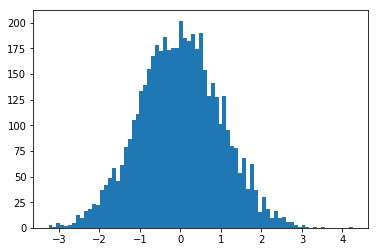

In [70]:
hist(A1t, bins = int(2.1681596565*A1t.shape[0]**.42))

In [67]:
15/100**cf

2.1681596561188914

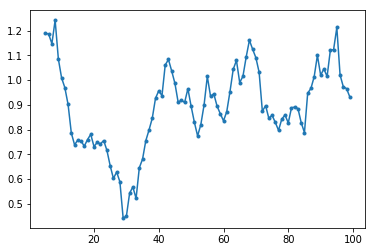

In [43]:
A1t = pddataT['A1']
nbins_l = arange(5,100)
var_l = np.zeros(nbins_l.shape[0])
for i,nbins in enumerate(nbins_l):
    h = histogram(A1t, bins = nbins)[0]
    hm = (h[1:]-h[:-1])
    var_l[i] = hm.std()/h.mean()
plot(nbins_l,var_l,'.-')

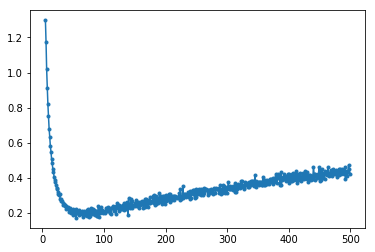

In [65]:
npts = [10,20,50,100,200,500,1000,2000,5000,10000,20000,50000]

A1t = randn(5000)
nbins_l = arange(5,500)
var_l = np.zeros(nbins_l.shape[0])
for i,nbins in enumerate(nbins_l):
    h = histogram(A1t, bins = nbins)[0]
    hm = (h[1:]-h[:-1])
    var_l[i] = hm.std()/h.mean()
plot(nbins_l,var_l,'.-')


[5.95       0.24974987]
[5.95       0.29559263]
[12.8         1.34089522]
[16.6         1.21737422]
[20.4         1.44118007]
[31.3         1.91454956]
[42.85        1.96249204]
[50.3         1.74083313]
[71.1         2.39154762]
[101.25         5.75581228]
[129.35         4.90676828]
[179.9          6.52491379]


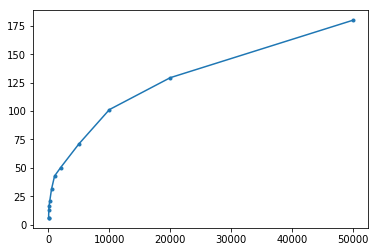

In [63]:
npts = [10,20,50,100,200,500,1000,2000,5000,10000,20000,50000]

bestnbins = np.zeros((len(npts),2))
ntrials = 20

for ib, npt in enumerate(npts):
    binta = np.zeros(ntrials)
    for it in range(ntrials):
        A1t = randn(npt)
        nbins_l = arange(5,500)
        var_l = np.zeros(nbins_l.shape[0])
        for i,nbins in enumerate(nbins_l):
            h = histogram(A1t, bins = nbins)[0]
            hm = (h[1:]-h[:-1])
            var_l[i] = hm.std()/h.mean()
        binta[it] = nbins_l[argmin(var_l)]
    bestnbins[ib,:] = binta.mean(),binta.std()/sqrt(ntrials)
    print(bestnbins[ib])
#plot(nbins_l,var_l,'.-')
plot(npts,bestnbins[:,0],'.-')

Text(0, 0.5, 'Optimal number of bins')

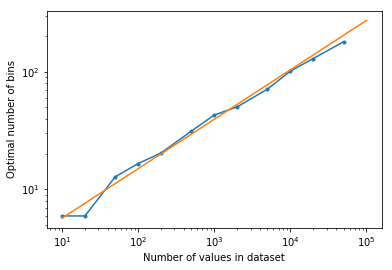

In [64]:
plot(npts,bestnbins[:,0],'.-')
xscale('log')
yscale('log')
xs = 10**linspace(1,5)
cf = 0.42; plot(xs,15*xs**cf/100**cf)
xlabel('Number of values in dataset')
ylabel('Optimal number of bins')

0 : 7.211982796560037e-05
(25, 35)


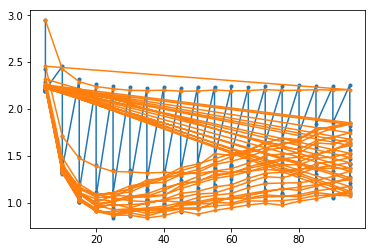

In [130]:
dataA = randn(10000,2)

nbins_l = arange(5,100,5)
nbins_l2 = list(itertools.product(nbins_l,nbins_l))
ns = [10,15]
h = histogramdd(dataA, bins = ns)[0]
var_l = np.zeros(nbins_l.shape[0]**2)
for i,nbins in enumerate(nbins_l2):
    #print(nbins)
    h = histogramdd(dataA, bins = nbins)[0]
    hdx = (h[1:,:]-h[:-1,:])
    hdy = (h[:,1:]-h[:,:-1])
    #hdz = (h[:,:,1:]-h[:,:,:-1])
    hmstd = np.sqrt(hdx.var()+hdy.var())
    var_l[i] = hmstd/h.mean()
    if i%1000 == 0:
        print(i, ':',hm.std()/h.mean() )
plot(nbins_l2,var_l,'.-')
print(nbins_l2[var_l.argmin()])

In [131]:
from mpl_toolkits.mplot3d import axes3d

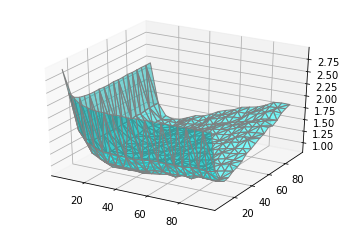

In [132]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
X,Y,Z = np.array(nbins_l2)[:,0],np.array(nbins_l2)[:,1],var_l
ax.plot_trisurf(X, Y, Z, color='cyan', edgecolors='grey', alpha=0.5)
#ax.scatter(X, Y, Z, c='red')
#for angle in range(0, 360):
#ax.view_init(azim = 120)
#plt.draw()
#plt.pause(.001)

In [135]:
dataA = randn(100000,3)

nbins_l = arange(5,50,2)
nbins_l3 = list(itertools.product(nbins_l,nbins_l,nbins_l))
var_l = np.zeros(nbins_l.shape[0]**3)
for i,nbins in enumerate(nbins_l3):
    #print(nbins)
    h = histogramdd(dataA, bins = nbins)[0]
    hdx = (h[1:,:]-h[:-1,:])
    hdy = (h[:,1:]-h[:,:-1])
    hdz = (h[:,:,1:]-h[:,:,:-1])
    hmstd = np.sqrt(hdx.var()+hdy.var()+hdz.var())
    var_l[i] = hmstd/h.mean()
    if i%1000 == 0:
        print(i, ':',hm.std()/h.mean() )
#plot(nbins_l3,var_l,'.-')
print(nbins_l3[var_l.argmin()])

0 : 3.6059913982800185e-05
1000 : 0.002453516547389724
2000 : 0.0060641236146595405
3000 : 0.003786290968194019
4000 : 0.00747074873930061
5000 : 0.003815138899380259
6000 : 0.006659544914343537
7000 : 0.00281700048033635
8000 : 0.003907452279176228
9000 : 0.0010688158504501973
10000 : 0.021822017545831355
11000 : 0.009048153616564221
12000 : 0.01929493877391672
(29, 33, 29)


In [141]:
from bootstrap_unshr import btset_cd

nsp = 1000000
sps = btset_cd(cd='Sp',size=nsp)

# spdata = dataset(data,noise=0.0)
# spdata['A2'][isnan(spdata['A2'])] = 0.0

# sel = ones(spdata['A2'].shape[0]) == 1
# keys = list(spdata.keys())
# print(keys)
# print(keys[3],keys[7],keys[11],keys[12])
# keys.pop(12)
# keys.pop(11)
# keys.pop(7)
# keys.pop(3)

# for key in keys:
#     sel = sel*isfinite(spdata[key])
    
# for key in spdata.keys():
#     spdata[key] = spdata[key][sel]

In [139]:
sps.keys()

dict_keys(['#Bch', 'Dsb', 'Dss', 'd_interSp', 'Vtot', 'Vh', 'Ln', 'SA', 'nPSD', 'A1', 'A2', 'GPHN SNR', 'DiS-EMchk', 'Lneck', 'maxDneck', 'minDneck', 'meanDneck', 'Rneck', 'Lhead', 'maxDhead', 'minDhead', 'meanDhead', 'Ah', 'Rhead', 'L', 'D', 'AhA0'])

In [200]:
#dataA = np.column_stack((sps['A1'],sps['Dss'],sps['Rneck']))
# Me habia olvidado de la respuesta 
dataA = np.column_stack((mesT[:,1]-mesT[:,2],pddataT['A1'],pddataT['Dss'],
                         pddataT['Rneck']))

def rescale(x):
    xme, xst = x.mean(0, keepdims = True), x.std(0, keepdims = True)
    xt = (x-xme)/xst
    return xt, (xme,xst)

def undorescale(x,xme,xst):
    xt = x*xst+xme
    return xt

dataA, datpar = rescale(dataA)
print(undorescale(dataA,*datpar).mean(0),datpar[0])

[ 2.77469689  0.14479431 81.97735452 85.75387461] [[ 2.77469689  0.14479431 81.97735452 85.75387461]]


In [207]:
np.take(h,5,axis=2).mean(), h[:,:,5,:].mean()

(0.0013268465280849183, 0.0013268465280849183)

In [254]:
print(dataA.var(0))
#dataAt = undorescale(dataA,*datpar)
dataA = np.column_stack((mesT[:,1]-mesT[:,2],pddataT['A1'],pddataT['Dss'],
                         pddataT['Rneck']))
dataA, datpar = rescale(dataA)

ns = [21,17,23, 19]
hf = histogramdd(dataA, bins = ns)

h = hf[0]
hxs = {}
hxm = {}
print(h.shape)
for i, hx in enumerate(hf[1]):
    hxs[i] = hx
    hxm[i] = (hx[1:]+hx[:-1])*.5
    
h = hf[0]

for ncol in range(4):
    hfun = hxs[0]
    nfun = h.shape[0]
    hx = hxs[ncol]
    nx = h.shape[ncol]

    Eygx = np.zeros(nx)
    for ix in range(nx):
        ht = np.take(h, ix, axis=ncol) # np.take(h,ix, axis = ncol)
        hxms = [hxm[i] for i in range(dataA.shape[1]) if i != ncol]

        # Weird but otherwise shapes do not match... need to check 
        # how this work precisely
        hxmt = hxms[1].copy()
        hxms[1] = hxms[0].copy()
        hxms[0] = hxmt

        XX = meshgrid(*hxms)
        Eygx[ix] = sum(XX[1]*ht)/sum(ht)
        #print(Eygx[ix])

    ht = h.sum(axis = tuple([i for i in range(dataA.shape[1]) if i != ncol]))
    hx = hxm[ncol]

    xme = np.nansum(Eygx*ht/sum(ht))
    xva = np.nansum((Eygx-xme)**2*ht/sum(ht))
    print(ncol,xme,xva)

[1. 1. 1. 1.]
(21, 17, 23, 19)
0 0.14502510281224817 0.004390434654959107
1 2.828091941919515 5.363197984930077
2 2.8280919419195154 0.6050790375093097
3 2.828091941919515 4.157051771570343


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


In [259]:
print(dataA.var(0))
#dataAt = undorescale(dataA,*datpar)
dataA = np.column_stack((mesT[:,3],pddataT['A1'],pddataT['Dss'],
                         pddataT['Rneck']))
dataA, datpar = rescale(dataA)

ns = [21,17,23, 19]
hf = histogramdd(dataA, bins = ns)

h = hf[0]
hxs = {}
hxm = {}
print(h.shape)
for i, hx in enumerate(hf[1]):
    hxs[i] = hx
    hxm[i] = (hx[1:]+hx[:-1])*.5
    
h = hf[0]

for ncol in range(4):
    hfun = hxs[0]
    nfun = h.shape[0]
    hx = hxs[ncol]
    nx = h.shape[ncol]

    Eygx = np.zeros(nx)
    for ix in range(nx):
        ht = np.take(h, ix, axis=ncol) # np.take(h,ix, axis = ncol)
        hxms = [hxm[i] for i in range(dataA.shape[1]) if i != ncol]

        # Weird but otherwise shapes do not match... need to check 
        # how this work precisely
        hxmt = hxms[1].copy()
        hxms[1] = hxms[0].copy()
        hxms[0] = hxmt

        XX = meshgrid(*hxms)
        Eygx[ix] = sum(XX[1]*ht)/sum(ht)
        #print(Eygx[ix])

    ht = h.sum(axis = tuple([i for i in range(dataA.shape[1]) if i != ncol]))
    hx = hxm[ncol]

    xme = np.nansum(Eygx*ht/sum(ht))
    xva = np.nansum((Eygx-xme)**2*ht/sum(ht))
    print(ncol,xme,xva)

[1. 1. 1. 1.]
(21, 17, 23, 19)
0 0.001652078695583481 0.8719618143290376
1 0.012831361689454899 0.8895640129999668
2 0.01283136168945489 0.08984647544315544
3 0.01283136168945491 0.18243606056385717


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


In [263]:
print(dataA.var(0))
#dataAt = undorescale(dataA,*datpar)
dataA = np.column_stack((mesT[:,2]/mesT[:,1],pddataT['A1'],pddataT['Dss'],
                         pddataT['Rneck']))
dataA, datpar = rescale(dataA)

ns = [21,17,23, 19]
hf = histogramdd(dataA, bins = ns)

h = hf[0]
hxs = {}
hxm = {}
print(h.shape)
for i, hx in enumerate(hf[1]):
    hxs[i] = hx
    hxm[i] = (hx[1:]+hx[:-1])*.5
    
h = hf[0]

for ncol in range(4):
    hfun = hxs[0]
    nfun = h.shape[0]
    hx = hxs[ncol]
    nx = h.shape[ncol]

    Eygx = np.zeros(nx)
    for ix in range(nx):
        ht = np.take(h, ix, axis=ncol) # np.take(h,ix, axis = ncol)
        hxms = [hxm[i] for i in range(dataA.shape[1]) if i != ncol]

        # Weird but otherwise shapes do not match... need to check 
        # how this work precisely
        hxmt = hxms[1].copy()
        hxms[1] = hxms[0].copy()
        hxms[0] = hxmt

        XX = meshgrid(*hxms)
        Eygx[ix] = sum(XX[1]*ht)/sum(ht)
        #print(Eygx[ix])

    ht = h.sum(axis = tuple([i for i in range(dataA.shape[1]) if i != ncol]))
    hx = hxm[ncol]

    xme = np.nansum(Eygx*ht/sum(ht))
    xva = np.nansum((Eygx-xme)**2*ht/sum(ht))
    print(ncol,xme,xva)

[1. 1. 1. 1.]
(21, 17, 23, 19)
0 0.001652078695583488 0.17546478128607293
1 -0.0002404347681664483 0.26576522378364015
2 -0.00024043476816643095 0.03978706965862508
3 -0.0002404347681664032 0.9461987058038032


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


In [264]:
.95/(.95+.27+.04)

0.753968253968254

In [234]:
ht = h.sum(axis = tuple([i for i in range(dataA.shape[1]) if i != ncol]))
hx = hxm[ncol]

xme = np.nansum(Eygx*hx*ht/sum(ht))
xva = np.nansum((Eygx-xme)**2*hx*ht/sum(ht))
print(xme,xva)

0.025247685330356182 0.02832220176068788


In [142]:
#dataA = np.column_stack((sps['A1'],sps['Dss'],sps['Rneck']))

nbins_l = arange(5,50,2)
nbins_l3 = list(itertools.product(nbins_l,nbins_l,nbins_l))
var_l = np.zeros(nbins_l.shape[0]**3)
for i,nbins in enumerate(nbins_l3):
    #print(nbins)
    h = histogramdd(dataA, bins = nbins)[0]
    hdx = (h[1:,:]-h[:-1,:])
    hdy = (h[:,1:]-h[:,:-1])
    hdz = (h[:,:,1:]-h[:,:,:-1])
    hmstd = np.sqrt(hdx.var()+hdy.var()+hdz.var())
    var_l[i] = hmstd/h.mean()
    if i%1000 == 0:
        print(i, ':',hm.std()/h.mean() )
#plot(nbins_l3,var_l,'.-')
print(nbins_l3[var_l.argmin()])

0 : 3.6059913982800183e-06
1000 : 0.00024535165473897245
2000 : 0.0006064123614659541
3000 : 0.0003786290968194019
4000 : 0.000747074873930061
5000 : 0.00038151388993802593
6000 : 0.0006659544914343538
7000 : 0.00028170004803363503
8000 : 0.0003907452279176228
9000 : 0.00010688158504501974
10000 : 0.002182201754583136
11000 : 0.0009048153616564222
12000 : 0.0019294938773916721
(17, 49, 9)


In [166]:
ns = [17,49,15]
hf = histogramdd(dataA, bins = ns)


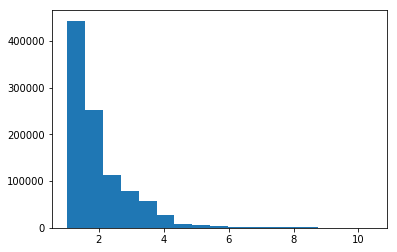

In [186]:
h = hist(dataA[:,0]+2.0,17)


In [187]:
hx = h[1]
dx = hx[1]-hx[0]
hx = (hx[:-1]+hx[1:])*.5

In [189]:
sum(h[0]*hx/sum(h[0]))

2.020205244965045

In [190]:
h = hf[0]
hxs = {}
hxm = {}
print(h.shape)
for i, hx in enumerate(hf[1]):
    hxs[i] = hx
    hxm[i] = (hx[1:]+hx[:-1])*.5
    print(i,hx.shape)
# hx, hy, hz = hf[1]
# hx = (hx[1:]+hx[:-1])*.5
# hy = (hy[1:]+hy[:-1])*.5
# hz = (hz[1:]+hz[:-1])*.5

(17, 49, 15)
0 (18,)
1 (50,)
2 (16,)


In [195]:
hx = hxs[0]
nx = h.shape[0]
Eygx = np.zeros(nx-1)
for ix in range(nx-1):
    ht = h[ix,:,:]
    XX, YY = meshgrid(hxm[2],hxm[1])
    # print(XX.shape,YY.shape, ht.shape)
    xme = sum(XX*ht)/sum(ht)
    yme = sum(YY*ht)/sum(ht)
    Eygx
    #xve = sum((XX-xme)**2*ht)/sum(ht)
    #yve = sum((YY-yme)**2*ht)/sum(ht)
    print(xme, yme)
    #reak

0.36086053711653454 -0.02686843789088367
-0.09327955751070502 -0.02279470371545439
-0.48443491515556314 0.099090117859539
-0.3960663473004735 0.07310438608101849
-0.4073705000560378 -0.02018458622663837
-0.39209230591167626 -0.055665510040210475
0.3046545047563401 0.14735381664721406
-0.19834505261684895 0.345786515901245
-0.3979311832166141 0.4370498031469069
0.7765612070140427 0.31178922661793446
1.0940606714072947 0.07546766613883361
0.18655870591034224 -0.2526405896216683
-0.4989675908038958 -0.40324243257551096
-0.6993921775548819 -0.38641765221774255
-0.7706946713150087 -0.34412196750891355
-0.7769806187047749 -0.24791800416849727


In [163]:
meshgrid(hy,hz)

[array([[ 14.90337347,  18.51729563,  22.13121779,  25.74513995,
          29.35906212,  32.97298428,  36.58690644,  40.2008286 ,
          43.81475077,  47.42867293,  51.04259509,  54.65651726,
          58.27043942,  61.88436158,  65.49828374,  69.11220591,
          72.72612807,  76.34005023,  79.95397239,  83.56789456,
          87.18181672,  90.79573888,  94.40966104,  98.02358321,
         101.63750537, 105.25142753, 108.8653497 , 112.47927186,
         116.09319402, 119.70711618, 123.32103835, 126.93496051,
         130.54888267, 134.16280483, 137.776727  , 141.39064916,
         145.00457132, 148.61849349, 152.23241565, 155.84633781,
         159.46025997, 163.07418214, 166.6881043 , 170.30202646,
         173.91594862, 177.52987079, 181.14379295, 184.75771511,
         188.37163727],
        [ 14.90337347,  18.51729563,  22.13121779,  25.74513995,
          29.35906212,  32.97298428,  36.58690644,  40.2008286 ,
          43.81475077,  47.42867293,  51.04259509,  54.65651726,
 

0 : 0.009879428488438407
1000 : 5.779465665736468
2000 : 3.9122536814216087
3000 : 9.60280449076213
4000 : 2.608169120947739
5000 : 9.405215920993362
6000 : 32.246454586262956


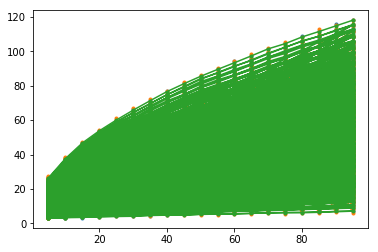

In [90]:
dataA = pddataT.values[:,:3]

nbins_l = arange(5,100,5)
nbins_l3 = list(itertools.product(nbins_l,nbins_l,nbins_l))
ns = [10,15,15]
h = histogramdd(dataA, bins = ns)[0]
var_l = np.zeros(nbins_l.shape[0]**3)
for i,nbins in enumerate(nbins_l3):
    h = histogramdd(dataA, bins = nbins)[0]
    hdx = (h[1:,:,:]-h[:-1,:,:])
    hdy = (h[:,1:,:]-h[:,:-1,:])
    hdz = (h[:,:,1:]-h[:,:,:-1])
    hmstd = np.sqrt(hdx.var()+hdy.var()+hdz.var())
    var_l[i] = hmstd/h.mean()
    if i%1000 == 0:
        print(i, ':',hm.std()/h.mean() )
plot(nbins_l3,var_l,'.-')

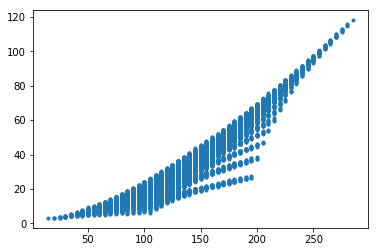

In [91]:
plot(np.array(nbins_l3).sum(1),var_l,'.')

In [93]:
nbins_l3[var_l.argmin()]

(10, 5, 5)

In [11]:
lineardVspdend = intpl.LinearNDInterpolator(pddataT.values,mesT[:,1]-mesT[:,2],rescale = True)

In [14]:
pddataT.values[0,:]

array([3.16088000e-02, 8.95482500e+01, 3.38711631e+02, 2.00000000e+00])

In [24]:
lineardVspdend(array([3.1108801e-02, 8.95482500e+01, 3.38711631e+02, 2.00000000e+00])),mesT[0,1]-mesT[0,2]

(array([nan]), 4.248389862277392)

In [7]:
regressor = LinearRegression()  
regressor.fit(datt, mesT[:,3])
coeforig = regressor.coef_*1.0
print(regressor.coef_)

[ 6.14864491e+00 -7.16923712e-03 -6.14108574e-04 -1.78065696e-02]


In [8]:
y_pred = regressor.predict(datt)

In [9]:
fullvarlinear = ((mesT[:,3]-y_pred)).var()
print(fullvarlinear)

0.0377532190369572
